In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos 
df_messages = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_messages.csv")
df_usuarios = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_users.csv")
df_internet = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_internet.csv")
df_calls = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_calls.csv")

In [6]:
# Mostrar información general
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
# Ver primeras filas
display(df_messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [8]:
# Ver valores nulos por columna
print("\nValores nulos por columna:")
print(df_messages.isnull().sum())


Valores nulos por columna:
id              0
user_id         0
message_date    0
dtype: int64


In [9]:
# Ver duplicados
print("\nFilas duplicadas:", df_messages.duplicated().sum())


Filas duplicadas: 0


In [10]:
# Estadísticas descriptivas
display(df_messages.describe())

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000



Número de usuarios con mensajes fuera del rango normal: 20


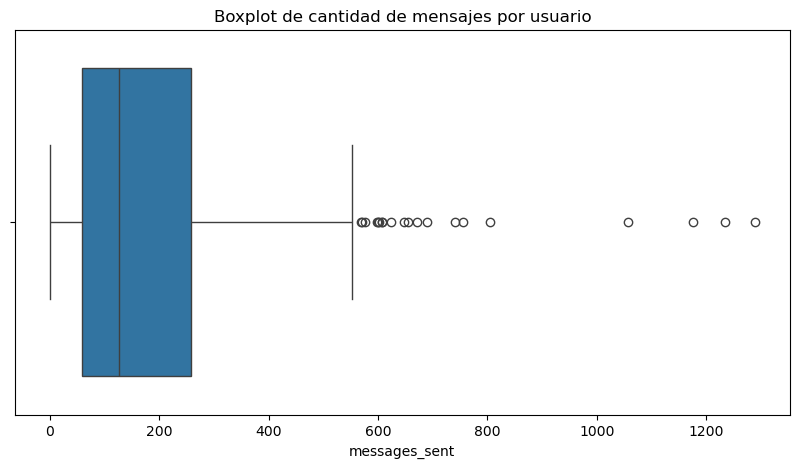

In [11]:
# Contar la cantidad de mensajes enviados por usuario
df_messages_count = df_messages.groupby("user_id").size().reset_index(name="messages_sent")

# Detección de outliers en mensajes enviados por usuario
Q1 = df_messages_count["messages_sent"].quantile(0.25)
Q3 = df_messages_count["messages_sent"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_messages_count[(df_messages_count["messages_sent"] < lower_bound) |
                             (df_messages_count["messages_sent"] > upper_bound)]
print("\nNúmero de usuarios con mensajes fuera del rango normal:", len(outliers))

# Visualización de outliers con boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_messages_count["messages_sent"])
plt.title("Boxplot de cantidad de mensajes por usuario")
plt.show()

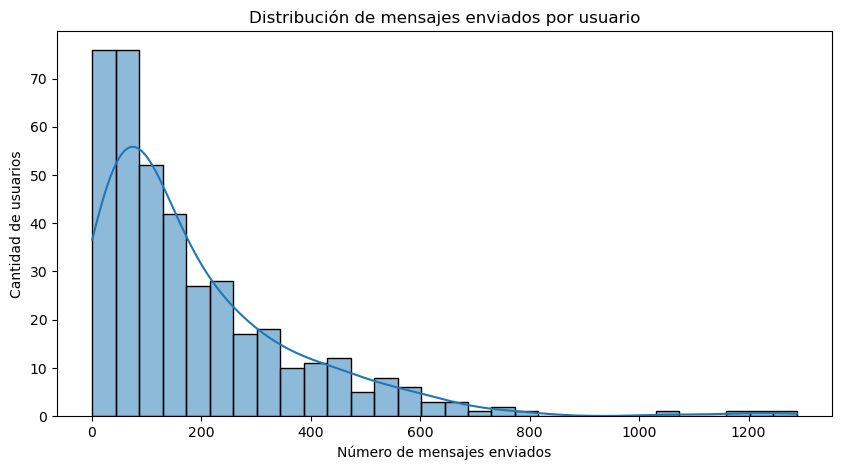

In [4]:
# Histograma de cantidad de mensajes enviados por usuario
df_messages_count = df_messages.groupby("user_id").size().reset_index(name="messages_sent")

plt.figure(figsize=(10, 5))
sns.histplot(df_messages_count["messages_sent"], bins=30, kde=True)
plt.title("Distribución de mensajes enviados por usuario")
plt.xlabel("Número de mensajes enviados")
plt.ylabel("Cantidad de usuarios")
plt.show()